In [1]:
import numpy as np
import scipy
import unittest
import matplotlib.pyplot as plt
import math

# Média Móvel

Estudante:

A. No Python (Numpy/Scipy), implemente com a função `scipy.signal.lfilter` um sistema média móvel de duas amostras. Considere a entrada $x=[10, 3, -3, 3, 8, 1, -2]$

In [2]:
from scipy.signal import lfilter
def moving_average(x:np.array) -> np.array:
    y = lfilter([0.5, 0.5], [1, 0], x)
    return y

class TestMA(unittest.TestCase):
    '''
    Utils: 
        assertEqual
        assertNotEqual
        assertTrue
        assertInt
    
    '''
    def test_basic(self):
        y = moving_average([10,3,-3,3,8,1,-2])
        self.assertTrue((np.abs(y - np.array([5, 6.5, 0, 0, 5.5, 4.5, -0.5]))<0.01).all())
        
    def test_edges(self):
        y = moving_average([0,0,0])
        self.assertTrue((np.abs(y - np.array([0,0,0]))<0.01).all())
        
        y = moving_average([1, 0, 1])
        self.assertTrue((np.abs(y - np.array([0.5,0.5,0.5]))<0.01).all())

                         
unittest.main(TestMA(), argv=[''], verbosity=2, exit=False)

test_basic (__main__.TestMA) ... ok
test_edges (__main__.TestMA) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.003s

OK


B. Verifique se a saída está correta (faça o cálculo manualmente). Foi por esse motivo que usamos um sinal $x(n)$ simples, para calcular a saída manualmente e ter certeza que a implementação está correta.

C. Verifique com a função `scipy.signal.freqz` a resposta em frequência do sistema. Que tipo de filtro é o sistema média móvel? 
Qual a sua frequência de corte, em Hz, considerando uma frequência de amostragem de 44100 Hz? 

Confira se o resultado está correto fazendo também de forma analítica. Anexe uma foto com seu cálculo. Para isso, lembre que a frequência de corte de um filtro é aquela em que a magnitude de $H(z)$ é $1 \over \sqrt 2$. Você já tem a resposta em frequência (olhe no vídeo). Obtenha a magnitude, depois iguale a $1 \over \sqrt 2$ e isole a frequência.

Frequencia de corte é 11025.0 Hz


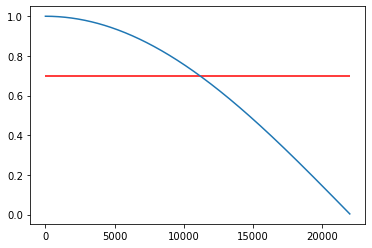

In [3]:
from scipy.signal import freqz
w, h = freqz([0.5, 0.5], fs=44100)

idx_corte = np.argmin(np.abs(np.abs(h) - 1/math.sqrt(2)))
print(f'Frequencia de corte é {w[idx_corte]} Hz')

plt.plot(w, np.abs(h))
plt.hlines(0.7, min(w), max(w), color='red')

D. Um tom senoidal puro de 17 kHz, amplitude de pico de 1,5 V, amostrado a 44,1 kHz, é aplicado à entrada do sistema média móvel de 2 amostras. Qual o sinal de saída (tipo, frequência e amplitude)? Mostre.

In [4]:
def tonegen(freq:float, duration:float, amplitude:float=1, fs:float=8000, play:bool=True) -> np.array:
    t = np.linspace(0., duration, int(fs * duration))
    x = np.sin(freq * 2. * np.pi * t)
    if play:
        plt.stem(x)
        display(Audio(x, rate=fs, autoplay=True)) # para mostrar o widget
    return x*amplitude

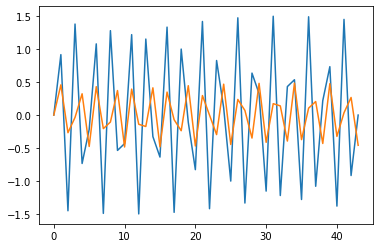

In [5]:
x = tonegen(freq=17000, duration=0.001, amplitude=1.5, fs=44100, play=False)
y = moving_average(x)
plt.plot(x)
plt.plot(y) #Percebese que o sinal possui a mesma frequencia e amplitude aproximadamente 30% da original

E. Com `zplane` (baixar de https://www.dsprelated.com/showcode/244.php), onde estão localizadas as singularidades (polos e zeros) no domínio Z do sistema média móvel de 2 amostras?

In [6]:
from  matplotlib import patches
from matplotlib.figure import Figure
from matplotlib import rcParams
    
def zplane(b,a,filename=None):
    '''
    Plot the complex z-plane given a transfer function.
    # Copyright (c) 2011 Christopher Felton
    #
    # This program is free software: you can redistribute it and/or modify
    # it under the terms of the GNU Lesser General Public License as published by
    # the Free Software Foundation, either version 3 of the License, or
    # (at your option) any later version.
    #
    # This program is distributed in the hope that it will be useful,
    # but WITHOUT ANY WARRANTY; without even the implied warranty of
    # MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    # GNU Lesser General Public License for more details.
    #
    # You should have received a copy of the GNU Lesser General Public License
    # along with this program.  If not, see <http://www.gnu.org/licenses/>.
    #

    # The following is derived from the slides presented by
    # Alexander Kain for CS506/606 "Special Topics: Speech Signal Processing"
    # CSLU / OHSU, Spring Term 2011.
    # https://www.dsprelated.com/showcode/244.php
    '''

    # get a figure/plot
    ax = plt.subplot(111)

    # create the unit circle
    uc = patches.Circle((0,0), radius=1, fill=False,
                        color='black', ls='dashed')
    ax.add_patch(uc)

    # The coefficients are less than 1, normalize the coeficients
    if np.max(b) > 1:
        kn = np.max(b)
        b = b/float(kn)
    else:
        kn = 1

    if np.max(a) > 1:
        kd = np.max(a)
        a = a/float(kd)
    else:
        kd = 1
        
    # Get the poles and zeros
    p = np.roots(a)
    z = np.roots(b)
    k = kn/float(kd)
    
    # Plot the zeros and set marker properties    
    t1 = plt.plot(z.real, z.imag, 'go', ms=10)
    plt.setp( t1, markersize=10.0, markeredgewidth=1.0,
              markeredgecolor='k', markerfacecolor='g')

    # Plot the poles and set marker properties
    t2 = plt.plot(p.real, p.imag, 'rx', ms=10)
    plt.setp( t2, markersize=12.0, markeredgewidth=3.0,
              markeredgecolor='r', markerfacecolor='r')

    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # set the ticks
    r = 1.5; plt.axis('scaled'); plt.axis([-r, r, -r, r])
    ticks = [-1, -.5, .5, 1]; plt.xticks(ticks); plt.yticks(ticks)

    if filename is None:
        plt.show()
    else:
        plt.savefig(filename)
    

    return z, p, k

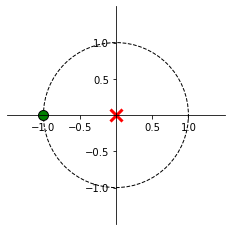

(array([-1.]), array([0.]), 1.0)

In [7]:
b = np.array([0.5, 0.5])
a = np.array([1, 0])
zplane(b,a)

F. Ainda no Python, implemente uma média móvel com quatro amostras. Há um efeito de suavização na saída?

In [8]:
from scipy.signal import lfilter
def moving_average(x:np.array, n=2) -> np.array:
    y = lfilter([1/n]*n, [1, 0], x)
    return y

class TestMA(unittest.TestCase):
    '''
    Utils: 
        assertEqual
        assertNotEqual
        assertTrue
        assertInt
    
    '''
    def test_basic(self):
        y = moving_average([10,3,-3,3,8,1,-2])
        self.assertTrue((np.abs(y - np.array([5, 6.5, 0, 0, 5.5, 4.5, -0.5]))<0.01).all())
        
    def test_edges(self):
        y = moving_average([0,0,0])
        self.assertTrue((np.abs(y - np.array([0,0,0]))<0.01).all())
        
        y = moving_average([1, 0, 1])
        self.assertTrue((np.abs(y - np.array([0.5,0.5,0.5]))<0.01).all())
        
        
        y = moving_average([0,0,0,0,0], n=4)
        self.assertTrue((np.abs(y - np.array([0,0,0,0,0]))<0.01).all())
        
    def test_basic_n(self):
        y = moving_average([10,3,-3,3,8,1,-2], n=4)
        self.assertTrue((np.abs(y - np.array([2.5, 3.25, 2.5, 3.25, 2.75, 2.25, 2.5]))<0.01).all())

                         
unittest.main(TestMA(), argv=[''], verbosity=2, exit=False)

test_basic (__main__.TestMA) ... ok
test_basic_n (__main__.TestMA) ... ok
test_edges (__main__.TestMA) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.004s

OK


G. Verifique a resposta em frequência do sistema com `freqz`. Qual a diferença em relação ao sistema de 2 amostras?

Frequencia de corte é 5038.76953125 Hz


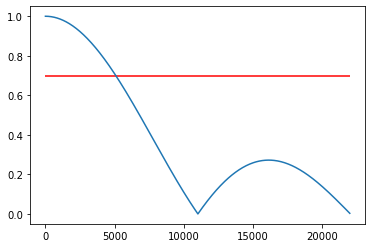

In [9]:
from scipy.signal import freqz
w, h = freqz([0.25, 0.25, 0.25, 0.25], fs=44100)

idx_corte = np.argmin(np.abs(np.abs(h) - 1/math.sqrt(2)))
print(f'Frequencia de corte é {w[idx_corte]} Hz')

plt.plot(w, np.abs(h))
plt.hlines(0.7, min(w), max(w), color='red') # Resultado: frequencia de corte caiu pela metade

H. Gere um sinal sweep no Ocenaudio (ou gere diretamente no Python) e grave em formato wav. Leia o arquivo no Python e use como entrada da média móvel com 4 amostras. Grave a saída, abra no Ocenaudio e observe a saída no tempo e no domínio da frequência. O resultado é condizente com o esperado no item G? Mostre.

ai que preguiça...

Imagino que observaríamos um atraso no tempo, além da amplitude do sinal ir diminuindo conforme a frequencia (seguindo a função de transferência do gráfico acima)